In [2]:
import numpy as np
import pandas as pd

# LDA
from sklearn.decomposition import LatentDirichletAllocation


In [3]:
# Read Data
df = pd.read_csv('construction_review.csv')
# 결측치 제거
df = df.dropna()
adv = df['adv'] # Advantage review
dadv = df['dadv'] # Disadvantage review
df.head()

,Unnamed: 0,cmp,adv,dadv
0,0,한국토지주택공사,공공기관 특성상 상대적으로 자유로운 휴가사용이 가능하다는것.전문자격증 취득을 원할경...,1.쓸데없는 자료요청과 잦은 회의 수직적구조2.노력대비 적은보상3.브랜드이미지 최하...
1,1,한전KPS(주),연봉 초임4넘고 3년차기준 5천넘어가며높은워라벨을즐김 공기업답게 워라벨이 좋고 복지...,돈은많이 벌지만 그돈이 오지생활이기에 술값으로 다나감. 발전소에서 근무를 하게 되면...
2,2,현대엔지니어링(주),계약직이어서 복지는 거의 해당이 없었지만 그래도 대기업인 만큼 사람들도 괜찮고 분위...,급여가 좀 적고 남녀성비가 안맞는게 단점이라면 단점이지만 나랑은 잘 맞았음 예산 사...
3,3,현대건설(주),연차를 자유롭게 사용가능. 현장에 따라서 자유로운 분위기 연차를 윗사람과 많이 겹치...,복지제도가 많으나 쓰기가 힘들고 아직 건설업의 문화가 남아있음 업무가 소장의 지시에...
4,4,(주)대우건설,대우 직원 분들 정이 많고 잘 챙겨주십니다.사람마다 케바케지만 대부분 정많고 오래 ...,중흥에서 인수하면서 회사 체계가 나락으로 가고 있음... 독자경영 약속하고 인수한거...


In [4]:
# Word Count
from konlpy.tag import Okt

t = Okt()

def my_tokenizer(doc):
    return [
        token
        for token, pos in t.pos(doc)
        if pos == 'Noun' and len(token)>1
    ]

In [5]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000, tokenizer = my_tokenizer)
review_cv = cv.fit_transform(df.adv)

/Users/myeongseop.kim/miniconda3/envs/textmining/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [6]:
print(cv.get_feature_names_out()[:100])

['가기' '가끔' '가능' '가능성' '가도' '가면' '가스' '가장' '가정' '가족' '가지' '각자' '각종' '간다'
 '간섭' '간식' '간의' '간판' '간혹' '갈수' '강남' '강남역' '강도' '강요' '강제' '개개인' '개념' '개발'
 '개선' '개월' '개인' '개인주의' '거나' '거리' '거의' '거주' '걱정' '건강검진' '건물' '건설' '건설업'
 '건축' '결재' '결정' '결제' '경기' '경기도' '경력' '경비' '경상' '경영' '경우' '경쟁' '경쟁력' '경조사'
 '경험' '계룡' '계발' '계속' '계약' '계열' '계획' '고객' '고려' '고민' '고용' '고정' '고함' '곳도'
 '공공기관' '공기업' '공단' '공동' '공무원' '공부' '공사' '공유' '공장' '공제' '공짜' '공채' '공함'
 '공휴일' '과거' '과금' '과장' '과정' '관계' '관련' '관리' '관리소' '관리자' '관바관' '관심' '괜찬음'
 '교대' '교대근무' '교보' '교육' '교육비']


In [7]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation
np.set_printoptions(precision = 3)

lda = LatentDirichletAllocation(n_components = 10,
                                max_iter = 5,
                                topic_word_prior = 0.1, doc_topic_prior = 1.0,
                                learning_method = 'online',
                                n_jobs = -1,
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('#Shape of review_topics:', review_topics.shape)
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents:',gross_topic_weights)
print('#shape of topic word distribution:', lda.components_.shape)

#Shape of review_topics: (108, 10)
#Sample of review_topics: [5.666e-04 6.017e-04 6.777e-04 5.637e-04 5.256e-04 1.994e-03 6.296e-04
 5.953e-04 6.352e-04 9.932e-01]
#Sum of topic weights of documents: [0.008 0.009 0.039 0.009 0.008 0.355 0.014 0.015 0.011 0.533]
#shape of topic word distribution: (10, 1000)


In [8]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d " % topic_idx, end='')
        print( ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
print_top_words(lda, cv.get_feature_names_out(),10)

Topic #0 연차, 복지, 사용, 가능, 근무, 장점, 회사, 분위기, 연봉, 현장
Topic #1 연차, 복지, 회사, 눈치, 업무, 사용, 가능, 근무, 분위기, 연봉
Topic #2 회사, 프로젝트, 연봉, 경험, 지원, 업무, 연차, 장점, 복지, 야근
Topic #3 연차, 사용, 회사, 연봉, 눈치, 복지, 장점, 현장, 분위기, 근무
Topic #4 연차, 사용, 회사, 가능, 사람, 분위기, 복지, 현장, 눈치, 월급
Topic #5 연차, 회사, 사용, 분위기, 눈치, 복지, 업무, 사람, 야근, 연봉
Topic #6 연차, 복지, 회사, 사용, 선물, 분위기, 눈치, 제공, 사람, 지원
Topic #7 회사, 연차, 복지, 연봉, 장점, 직원, 급여, 사용, 업무, 월급
Topic #8 연차, 회사, 업무, 사람, 현장, 월급, 장점, 가능, 사용, 급여
Topic #9 연차, 복지, 사용, 회사, 현장, 업무, 사람, 눈치, 가능, 분위기



n_components: 5, perplextiy: 426.510
n_components: 6, perplextiy: 423.366
n_components: 7, perplextiy: 426.900
n_components: 8, perplextiy: 429.763
n_components: 9, perplextiy: 435.567
n_components: 10, perplextiy: 441.250
n_components: 11, perplextiy: 446.116
n_components: 12, perplextiy: 447.743
n_components: 13, perplextiy: 453.770
n_components: 14, perplextiy: 454.623
n_components: 15, perplextiy: 459.122


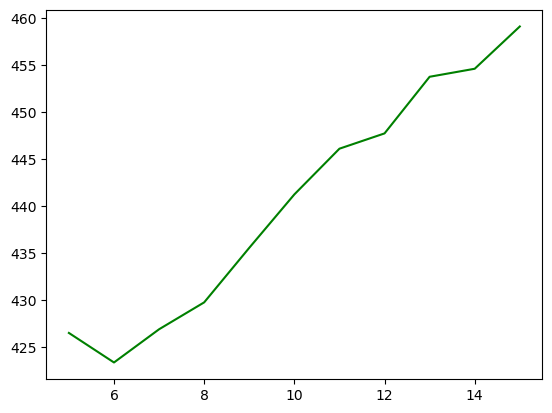

n_components with minimum perplexity:  6


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end = 30, max_iter=5, topic_word_prior=0.1,
                    doc_topic_prior=1.0):
    iter_num=[]
    per_value=[]

    for i in range(start, end+1):
        lda = LatentDirichletAllocation(n_components = i, max_iter = max_iter,
                                        topic_word_prior = topic_word_prior,
                                        doc_topic_prior = doc_topic_prior,
                                        learning_method = 'batch', n_jobs = -1,
                                        random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplextiy: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity: ",
      show_perplexity(review_cv, start=5, end=15))


In [11]:
lda = LatentDirichletAllocation(n_components = 6,
                                max_iter = 20,
                                topic_word_prior = 0.1, doc_topic_prior = 1.0,
                                learning_method = 'batch',
                                n_jobs = -1,
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 4)

Topic #0 복지, 대기업, 연차, 근무
Topic #1 연차, 복지, 사용, 눈치
Topic #2 건물, 장점, 회사, 커피
Topic #3 연차, 공기업, 근무, 업무
Topic #4 연차, 사용, 가능, 업무
Topic #5 회사, 현장, 연봉, 직원

